In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[0, 23, 23]

194

In [9]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


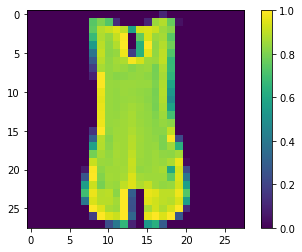

In [33]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

# Preprocessing
We need to preprocess our data to make it easier for the Neural Network to update the biases and weights.

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Creating the model
This is where we define the architecture of our Neural Network.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax')  # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training the model
We *fit* the model to the training data in order to train it.

In [25]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2154 - accuracy: 0.9192


# Evaluating the model
Now that we've trained the model, we'd like to evaluate its accuracy with the test dataset.

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8834
Test accuracy: 0.883400022983551


# Predicting
Now let's test a prediction.

Coat


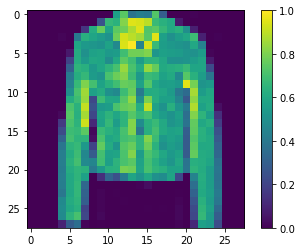

In [38]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()